In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, header = None, names = cols)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='class', ylabel='petal_width'>

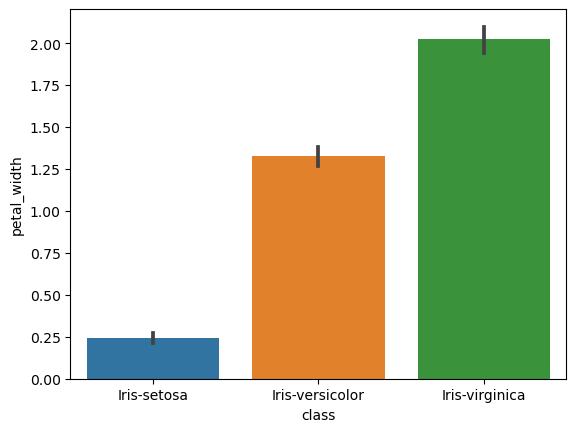

In [10]:
sns.barplot(x = 'class', y = 'petal_width', data = iris)

<AxesSubplot:xlabel='class', ylabel='petal_length'>

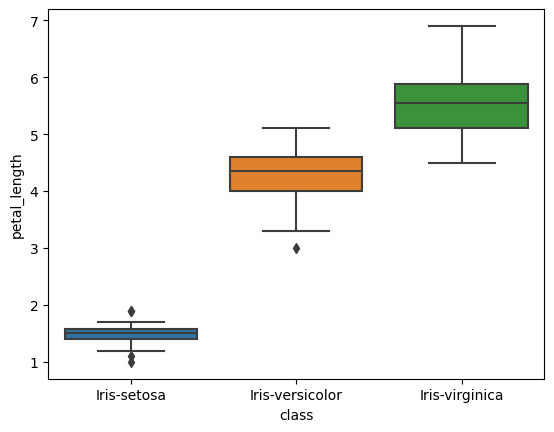

In [13]:
sns.boxplot(x = 'class', y = 'petal_length', data = iris)

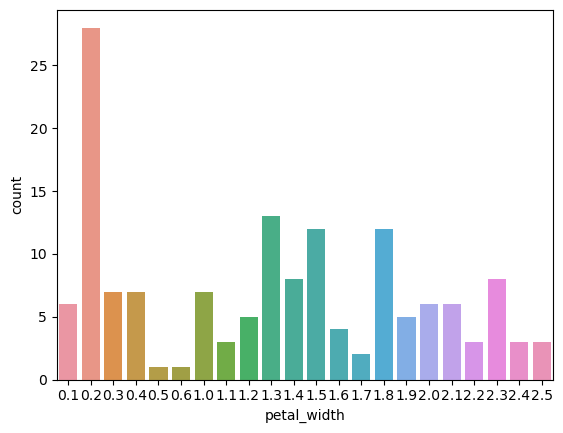

In [16]:
sns.countplot(x = 'petal_width', data = iris)
plt.show()

c:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

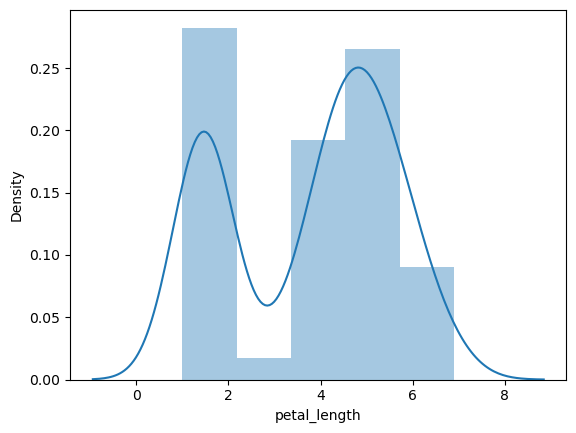

In [17]:
sns.distplot(iris['petal_length'])

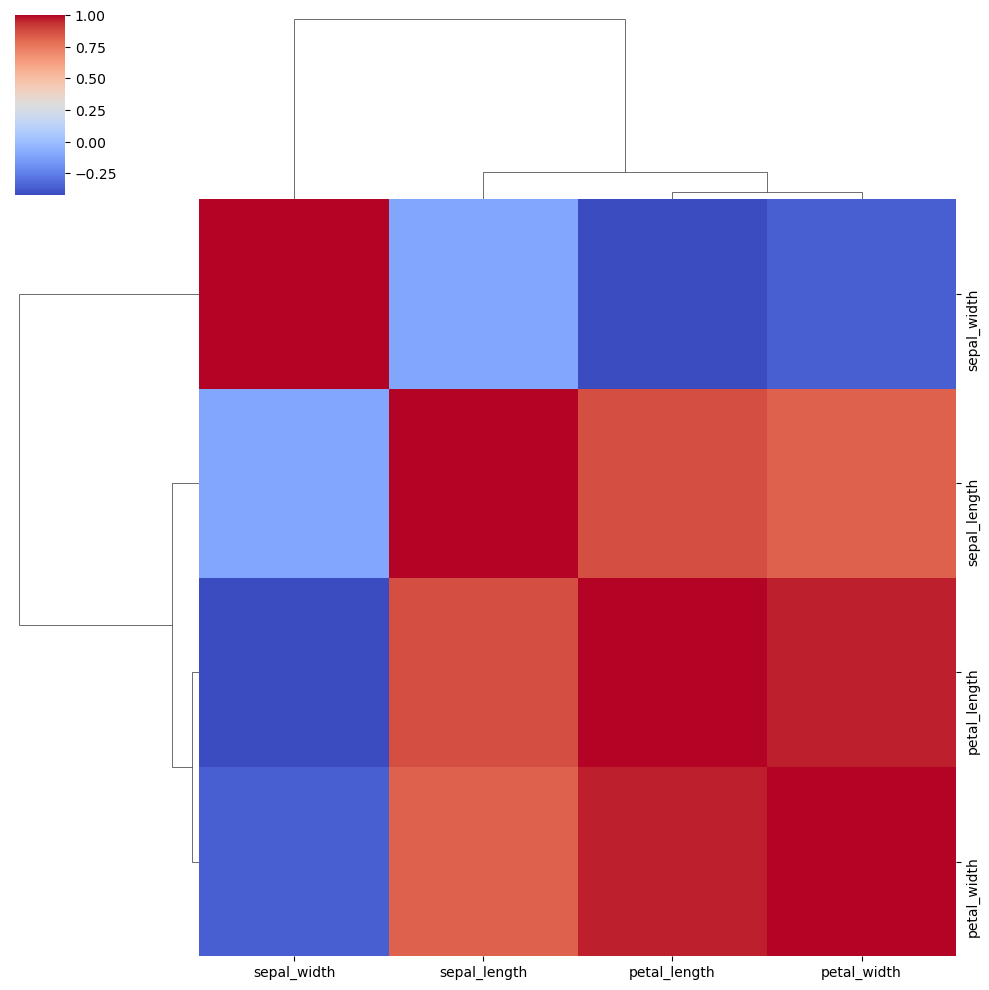

In [18]:
sns.clustermap(iris.corr(), cmap = 'coolwarm')

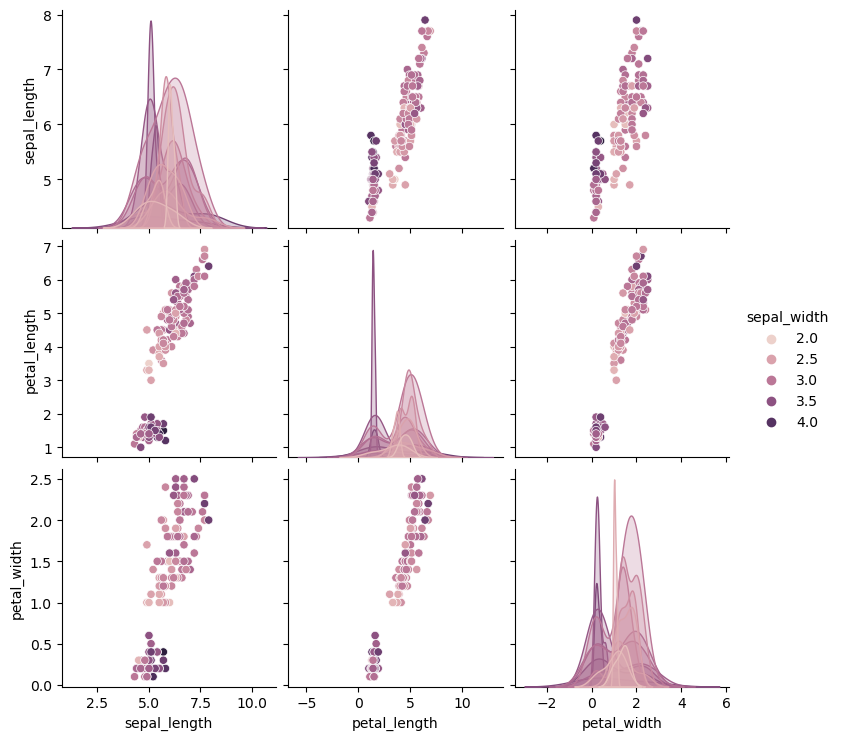

In [19]:
sns.pairplot(iris, hue = 'sepal_width')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
x = iris.drop(['class', 'petal_length', 'petal_width'], axis = 1)

In [63]:
y = iris['class']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [65]:
scaler = StandardScaler()

In [66]:
x_train = scaler.fit_transform(x_train)

In [67]:
x_test = scaler.fit_transform(x_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 50)

In [78]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [79]:
from sklearn.metrics import classification_report

In [80]:
x_prediction = knn.predict(x_test)

c:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
x_prediction

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [82]:
print(classification_report(y_test, x_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        16
Iris-versicolor       0.75      0.50      0.60        18
 Iris-virginica       0.50      0.73      0.59        11

       accuracy                           0.73        45
      macro avg       0.73      0.74      0.72        45
   weighted avg       0.76      0.73      0.73        45



In [83]:
error_rate = []
for i in range(1, 45):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))

c:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

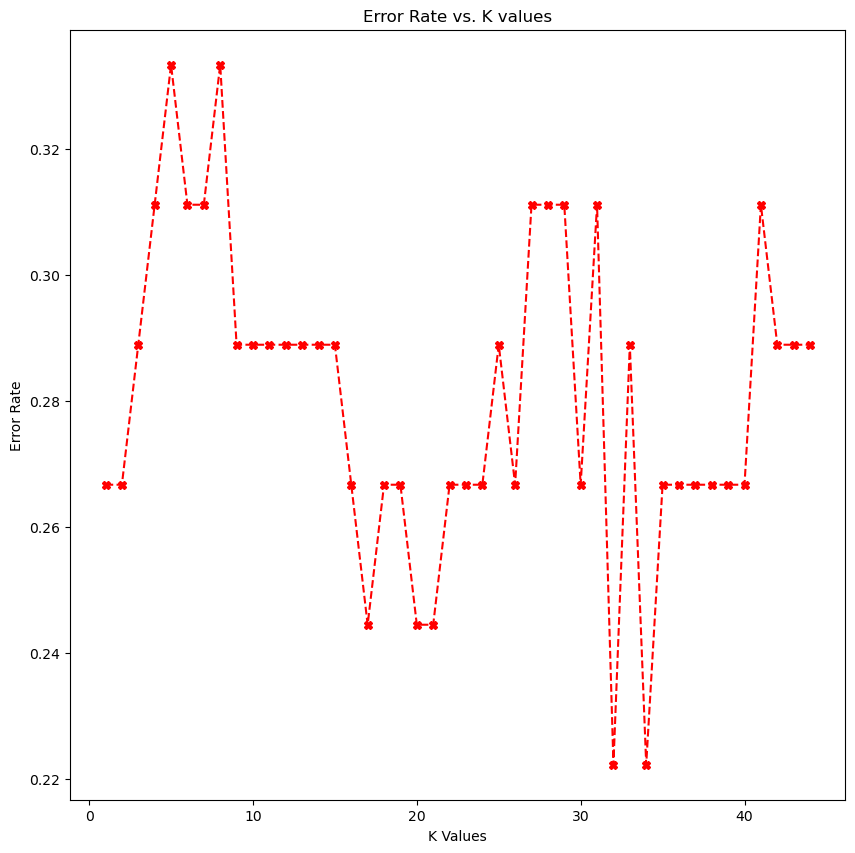

In [84]:
plt.figure(figsize = (10, 10))
error_rate
plt.plot(range(1, 45), error_rate, color = 'red', linestyle = 'dashed', marker = 'X')
plt.title('Error Rate vs. K values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')